**A Simple Recurrent Neural Network**

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/cansim-0800020-eng-6674700030567901031.csv', skiprows=6, skipfooter=9)
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,Adjustments,Unadjusted,Seasonally adjusted
0,Jan-1991,12588862,15026890
1,Feb-1991,12154321,15304585
2,Mar-1991,14337072,15413591
3,Apr-1991,15108570,15293409
4,May-1991,17225734,15676083


In [3]:
from pandas.tseries.offsets import MonthEnd

In [4]:
df['Adjustments'] = pd.to_datetime(df['Adjustments']) + MonthEnd(1)
df = df.set_index('Adjustments') 

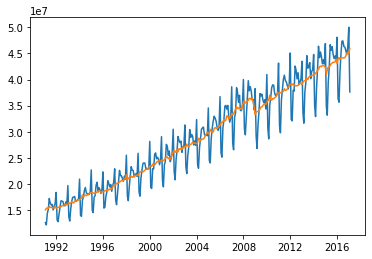

In [5]:
plt.plot(df)

In [6]:
split_date = pd.Timestamp('01-01-2011')

In [7]:
train = df.loc[:split_date, ['Unadjusted']]
test = df.loc[split_date:, ['Unadjusted']]

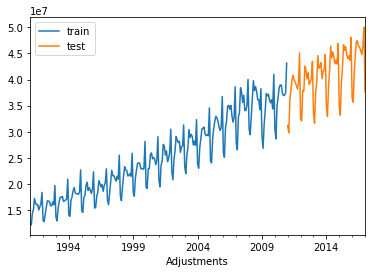

In [8]:
ax = train.plot()
test.plot(ax=ax)
plt.legend(['train','test'])

In [9]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()

train_sc = sc.fit_transform(train)
test_sc = sc.transform(test)

In [10]:
X_train = train_sc[:-1]
y_train = train_sc[1:]

X_test = test_sc[:-1]
y_test = test_sc[1:]

In [11]:
# Fully connected predictor
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping

In [12]:
K.clear_session()

model = Sequential()
model.add(Dense(12, input_dim = 1, activation = 'relu'))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                24        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 13        
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


In [13]:
early_stop = EarlyStopping(monitor = 'loss', patience = 1, verbose = 1)

In [14]:
model.fit(X_train, y_train, epochs = 200,
          batch_size = 2, verbose = 1,
          callbacks = [early_stop])

Epoch 1/200
120/120 [==============================] - 1s 1ms/step - loss: 0.1032
Epoch 2/200
120/120 [==============================] - 0s 906us/step - loss: 0.0137
Epoch 3/200
120/120 [==============================] - 0s 941us/step - loss: 0.0132
Epoch 4/200
120/120 [==============================] - 0s 1ms/step - loss: 0.0135
Epoch 5/200
120/120 [==============================] - 0s 1ms/step - loss: 0.0096
Epoch 6/200
120/120 [==============================] - 0s 1ms/step - loss: 0.0105
Epoch 7/200
120/120 [==============================] - 0s 960us/step - loss: 0.0101
Epoch 8/200
120/120 [==============================] - 0s 1ms/step - loss: 0.0126
Epoch 9/200
120/120 [==============================] - 0s 1ms/step - loss: 0.0091
Epoch 10/200
120/120 [==============================] - 0s 1ms/step - loss: 0.0087
Epoch 11/200
120/120 [==============================] - 0s 913us/step - loss: 0.0112
Epoch 00011: early stopping


In [15]:
y_pred = model.predict(X_test)

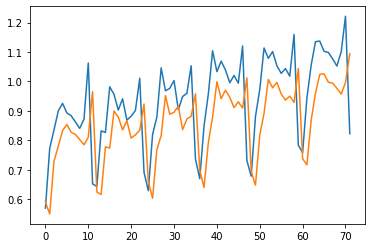

In [16]:
plt.plot(y_test)
plt.plot(y_pred)

**Recurrent predictor**

In [24]:
from keras.layers import LSTM

In [25]:
X_train.shape

(239, 1)

In [26]:
X_train[:, None].shape

(239, 1, 1)

In [27]:
X_train_t = X_train[:, None]
X_test_t = X_test[:, None]

In [28]:
K.clear_session()

model = Sequential()
model.add(LSTM(6, input_shape = (1, 1)))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [29]:
model.fit(X_train_t, y_train, epochs = 100, batch_size = 1, verbose = 1, callbacks = [early_stop])

Epoch 1/100
239/239 [==============================] - 2s 1ms/step - loss: 0.2029
Epoch 2/100
239/239 [==============================] - 0s 2ms/step - loss: 0.0664
Epoch 3/100
239/239 [==============================] - 0s 2ms/step - loss: 0.0446
Epoch 4/100
239/239 [==============================] - 0s 1ms/step - loss: 0.0345
Epoch 5/100
239/239 [==============================] - 0s 1ms/step - loss: 0.0309
Epoch 6/100
239/239 [==============================] - 0s 2ms/step - loss: 0.0226
Epoch 7/100
239/239 [==============================] - 0s 2ms/step - loss: 0.0192
Epoch 8/100
239/239 [==============================] - 0s 1ms/step - loss: 0.0162
Epoch 9/100
239/239 [==============================] - 0s 1ms/step - loss: 0.0119
Epoch 10/100
239/239 [==============================] - 0s 1ms/step - loss: 0.0096
Epoch 11/100
239/239 [==============================] - 0s 1ms/step - loss: 0.0095
Epoch 12/100
239/239 [==============================] - 0s 1ms/step - loss: 0.0096
Epoch 00012: 

In [30]:
y_pred = model.predict(X_test_t)

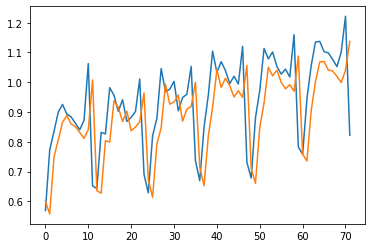

In [31]:
plt.plot(y_test)
plt.plot(y_pred)

**Deep Learning on Windows**

In [32]:
train_sc.shape

(240, 1)

In [33]:
train_sc_df = pd.DataFrame(train_sc, columns = ['Scaled'], index = train.index)
test_sc_df = pd.DataFrame(test_sc, columns = ['Scaled'], index = test.index)
train_sc_df.head()

,Scaled
Adjustments,
1991-01-31,0.014020
1991-02-28,0.000000
1991-03-31,0.070426
1991-04-30,0.095318
1991-05-31,0.163628


In [34]:
for s in range(1, 13):
    train_sc_df['shift_{}'.format(s)] = train_sc_df['Scaled'].shift(s)
    test_sc_df['shift_{}'.format(s)] = test_sc_df['Scaled'].shift(s)

In [35]:
train_sc_df.head(13)

,Scaled,shift_1,shift_2,shift_3,shift_4,shift_5,shift_6,shift_7,shift_8,shift_9,shift_10,shift_11,shift_12
Adjustments,,,,,,,,,,,,,
1991-01-31,0.014020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-02-28,0.000000,0.014020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-03-31,0.070426,0.000000,0.014020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-04-30,0.095318,0.070426,0.000000,0.014020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-05-31,0.163628,0.095318,0.070426,0.000000,0.014020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-06-30,0.135141,0.163628,0.095318,0.070426,0.000000,0.014020,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-07-31,0.123958,0.135141,0.163628,0.095318,0.070426,0.000000,0.014020,NaN,NaN,NaN,NaN,NaN,NaN
1991-08-31,0.126174,0.123958,0.135141,0.163628,0.095318,0.070426,0.000000,0.014020,NaN,NaN,NaN,NaN,NaN
1991-09-30,0.092309,0.126174,0.123958,0.135141,0.163628,0.095318,0.070426,0.000000,0.014020,NaN,NaN,NaN,NaN


In [53]:
X_train = train_sc_df.dropna().drop('Scaled', axis = 1)
y_train = train_sc_df.dropna()[['Scaled']]

X_test = test_sc_df.dropna().drop('Scaled', axis = 1)
y_test = test_sc_df.dropna()[['Scaled']]

In [54]:
X_train.head()

,shift_1,shift_2,shift_3,shift_4,shift_5,shift_6,shift_7,shift_8,shift_9,shift_10,shift_11,shift_12
Adjustments,,,,,,,,,,,,
1992-01-31,0.200913,0.131738,0.111395,0.092309,0.126174,0.123958,0.135141,0.163628,0.095318,0.070426,0.000000,0.014020
1992-02-29,0.030027,0.200913,0.131738,0.111395,0.092309,0.126174,0.123958,0.135141,0.163628,0.095318,0.070426,0.000000
1992-03-31,0.019993,0.030027,0.200913,0.131738,0.111395,0.092309,0.126174,0.123958,0.135141,0.163628,0.095318,0.070426
1992-04-30,0.065964,0.019993,0.030027,0.200913,0.131738,0.111395,0.092309,0.126174,0.123958,0.135141,0.163628,0.095318
1992-05-31,0.109831,0.065964,0.019993,0.030027,0.200913,0.131738,0.111395,0.092309,0.126174,0.123958,0.135141,0.163628


In [55]:
X_train.shape

(228, 12)

In [56]:
X_train = X_train.values
X_test = X_test.values

y_train = y_train.values
y_test = y_test.values

**Fully Connected for Windows**

In [58]:
K.clear_session()

model = Sequential()
model.add(Dense(12, input_dim = 12, activation = 'relu'))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                156       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 13        
Total params: 169
Trainable params: 169
Non-trainable params: 0
_________________________________________________________________


In [59]:
model.fit(X_train, y_train, epochs = 200, batch_size = 1, verbose = 1, callbacks = [early_stop])

Epoch 1/200
228/228 [==============================] - 0s 943us/step - loss: 0.2509
Epoch 2/200
228/228 [==============================] - 0s 932us/step - loss: 0.0097
Epoch 3/200
228/228 [==============================] - 0s 1ms/step - loss: 0.0088
Epoch 4/200
228/228 [==============================] - 0s 948us/step - loss: 0.0059
Epoch 5/200
228/228 [==============================] - 0s 1ms/step - loss: 0.0061
Epoch 6/200
228/228 [==============================] - 0s 1ms/step - loss: 0.0051
Epoch 7/200
228/228 [==============================] - 0s 1ms/step - loss: 0.0063
Epoch 8/200
228/228 [==============================] - 0s 1ms/step - loss: 0.0055
Epoch 9/200
228/228 [==============================] - 0s 967us/step - loss: 0.0053
Epoch 10/200
228/228 [==============================] - 0s 1ms/step - loss: 0.0052
Epoch 11/200
228/228 [==============================] - 0s 1ms/step - loss: 0.0043
Epoch 12/200
228/228 [==============================] - 0s 1ms/step - loss: 0.0036
Epoch

In [61]:
y_pred = model.predict(X_test)

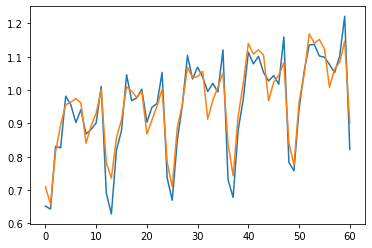

In [62]:
plt.plot(y_test)
plt.plot(y_pred)

**LSTM on windows**

In [63]:
X_train_t = X_train.reshape(X_train.shape[0], 1, 12)
X_test_t = X_test.reshape(X_test.shape[0], 1, 12)

In [65]:
K.clear_session()

model = Sequential()
model.add(LSTM(6, input_shape = (1, 12)))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [66]:
model.fit(X_train_t, y_train, epochs = 100, batch_size = 1, verbose = 1, callbacks = [early_stop])

Epoch 1/100
228/228 [==============================] - 2s 1ms/step - loss: 0.0501
Epoch 2/100
228/228 [==============================] - 0s 1ms/step - loss: 0.0088
Epoch 3/100
228/228 [==============================] - 0s 1ms/step - loss: 0.0081
Epoch 4/100
228/228 [==============================] - 0s 1ms/step - loss: 0.0055
Epoch 5/100
228/228 [==============================] - 0s 1ms/step - loss: 0.0066
Epoch 6/100
228/228 [==============================] - 0s 2ms/step - loss: 0.0046
Epoch 7/100
228/228 [==============================] - 0s 2ms/step - loss: 0.0031
Epoch 8/100
228/228 [==============================] - 0s 1ms/step - loss: 0.0030
Epoch 9/100
228/228 [==============================] - 0s 1ms/step - loss: 0.0023
Epoch 10/100
228/228 [==============================] - 0s 2ms/step - loss: 0.0025
Epoch 00010: early stopping


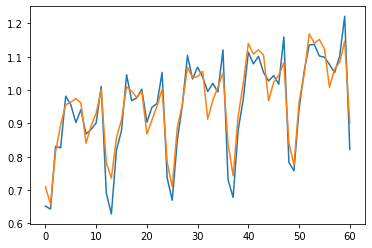

In [67]:
plt.plot(y_test)
plt.plot(y_pred)